In [2]:
from qudit import *
import matplotlib.pyplot as plt
import numpy as np

# angular PDF

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

import mpmath
mpmath.mp.prec = 1000  # Increase precision to ~30 decimal digits, for example

def p_dephasing_mpmath(gamma, s, d):
    if s > (d / 2):
        s -= d
    x_left  = mpmath.sqrt(1/(2*gamma)) * (2*s - 1)*mpmath.pi / d
    x_right = mpmath.sqrt(1/(2*gamma)) * (2*s + 1)*mpmath.pi / d
    return mpmath.erf(x_right) - mpmath.erf(x_left)


# Parameters
d = 32
gamma = 1e-2
q = Qudit(d)

# 1) Continuous PDF (no factor of dphi in front)
N = 1000
angles = np.linspace(-np.pi, np.pi, N)
continuous_pdf = (
    1 / np.sqrt(2 * np.pi * gamma)
    * np.exp(-angles**2 / (2 * gamma))
)

# 2) Discrete PDF
bin_width = (2*np.pi) / d
discrete_pdf = []
phi_edges = []
discrete_inds = np.arange(-d//2, d//2)

for s in discrete_inds:
    # Probability in this bin:
    p_s = p_dephasing_mpmath(gamma, s, d) / 2
    # The bin is from ((2s-1)*π/d) to ((2s+1)*π/d),
    # so we calculate its edges:
    phi_left = ((2*s - 1)*np.pi/d)
    phi_right = ((2*s + 1)*np.pi/d)
    
    # Convert integrated probability in the bin to a PDF value:
    pdf_s = p_s / bin_width
    
    discrete_pdf.append(pdf_s)
    phi_edges.append(phi_left)
phi_edges.append(((2*s + 1)*np.pi/d))  # Add the right edge of the last bin


# loss

In [10]:
import math

n_bar = 49
d = 32
gamma_l = 1e-2
p_l = [gamma_l**l / math.factorial(l) * (1-gamma_l)**n_bar * n_bar**l for l in range(d)]

# Plot

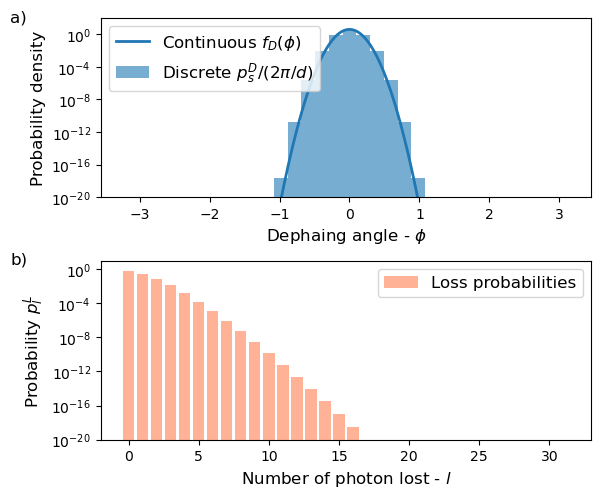

In [64]:
# Plot two figures one above the other
fig, axs = plt.subplots(2, 1, figsize=(6, 5))

fontsize = 12
axs[0].plot(angles, continuous_pdf, label=r'Continuous $f_D(\phi)$', linewidth=2)
axs[0].bar(
    phi_edges[:-1],  # Left edges of bins
    discrete_pdf,    # Heights
    width=bin_width, # Width of bins
    align='edge',    # Align bar edges with bin edges
    alpha=0.6,       # Slight transparency for visibility
    label=r'Discrete ${p_s^D}/{(2\pi/d)}$'
)
axs[0].set_xlabel(r'Dephaing angle - $\phi$', fontsize=fontsize)
axs[0].set_ylabel(r'Probability density', fontsize=fontsize)
axs[0].legend(fontsize=fontsize)
axs[0].set_yscale('log')
axs[0].set_ylim([1e-20, 100])

axs[1].bar(range(d), p_l, align='center', alpha=0.6, label='Loss probabilities', color='coral')
axs[1].set_xlabel('Number of photon lost - $l$', fontsize=fontsize)
axs[1].set_ylabel(r'Probability $p_l^{L}$', fontsize=fontsize)
axs[1].legend(fontsize=fontsize)
axs[1].set_yscale('log')
axs[1].set_ylim([1e-20, 10])

fig.tight_layout()

# Add labels (a) and (b) to the subplots
axs[0].text(-0.15, 1.05, 'a)', transform=axs[0].transAxes, fontsize=fontsize, va='top', ha='right')
axs[1].text(-0.15, 1.05, 'b)', transform=axs[1].transAxes, fontsize=fontsize, va='top', ha='right')


fig.savefig('./results/error_probabilites.pdf', bbox_inches='tight')


In [46]:
print(p_l)

[0.611117239532865, 0.29944744737110385, 0.07336462460592044, 0.011982888685633675, 0.0014679038639901249, 0.00014385457867103227, 1.1748123924800968e-05, 8.223686747360679e-07, 5.037008132758415e-08, 2.742371094501804e-09, 1.343761836305884e-10, 5.9858481799080295e-12, 2.444221340129112e-13, 9.212834282025115e-15, 3.2244919987087894e-16, 1.0533340529115379e-17, 3.2258355370415854e-19, 9.297996547943392e-21, 2.5311212824957017e-22, 6.5276285706468096e-24, 1.5992689998084684e-25, 3.7316276662197595e-27, 8.311352529307645e-29, 1.7706794518959764e-30, 3.615137214287619e-32, 7.085668940003734e-34, 1.335376069462242e-35, 2.4234602742092546e-37, 4.2410554798661954e-39, 7.165921328049778e-41, 1.1704338169147972e-42, 1.8500405493169378e-44]
